In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import *
from sampling.ld_least_squares_sampling import *
from models.ld_regression_model import *

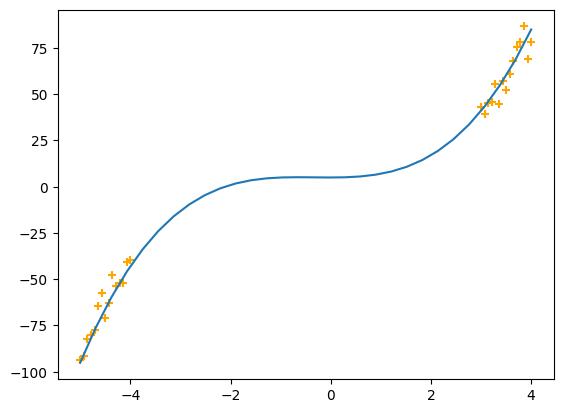

In [2]:
# training data generation
sigma = 5
f = lambda x : x**3 + x**2 + 5
x_test = np.linspace(-5, 4, 30)
y_test = f(x_test)
x_train = np.concatenate((np.linspace(-5, -4, 15), np.linspace(3,4,15)))
y_train = f(x_train) + np.random.normal(0, sigma, len(x_train))
plt.scatter(x_train, y_train, marker='+', color='Orange')
plt.plot(x_test, y_test)
plt.show()

# number of dimensions of basis function
d_dash = 4

# phi function for LR
def phi(x):
	return np.array([1, x, x**2, x**3], dtype=object)

In [3]:
mean = np.array([5, 0, 1, 1])
b = 1/sigma**2
model = LDRegressionModel(x_train, y_train, np.full(len(x_train), b*0.5), np.diag(np.full(d_dash, 0.1)), phi)
sampler = LDLeastSquaresSampler(model, minimizer2, mean)
means, samples = sampler.sample(100, alpha_0=1, max_iters=5, int_samples=100)

100%|██████████| 5/5 [00:37<00:00,  7.41s/it]


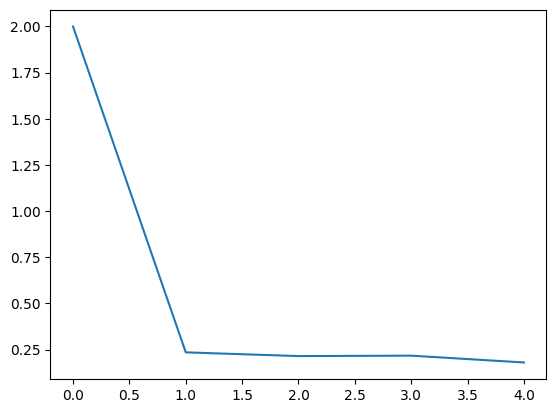

In [4]:
plt.plot(means)

In [5]:
H = sampler.get_M() + sampler.model.A
E_samples = sampler.E_step(100)
test_samples = np.random.multivariate_normal(np.zeros(sampler.get_d_dash()), np.linalg.inv(H), size=100)

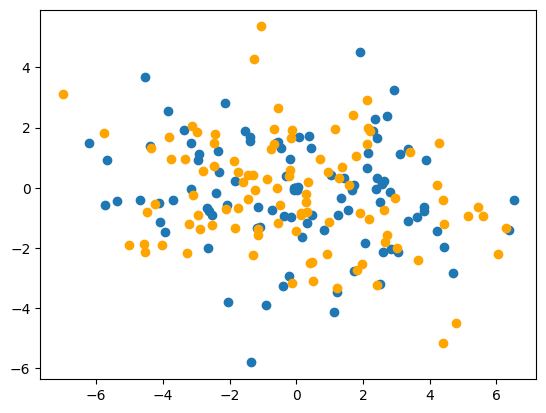

In [6]:
plt.scatter(E_samples[:,0], E_samples[:,1])
plt.scatter(test_samples[:,0], test_samples[:,1], c='Orange')

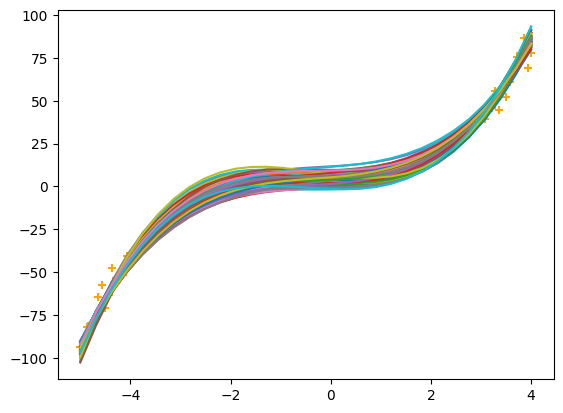

In [7]:
for s in samples:
	plt.plot(x_test, s @ phi(x_test))
plt.scatter(x_train, y_train, marker='+', color='Orange')